In [1]:
from itertools import islice, combinations, product
from scipy.spatial.distance import squareform

import os
import scipy
import time
import graco
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
sns.set()
DATA_DIRECTORY = "/home/clusterduck123/Desktop/git/supplements/data"

In [3]:
PPI_nx = nx.read_edgelist(f"{DATA_DIRECTORY}/PPI/BioGRID_sc.txt")

N   = PPI_nx.number_of_nodes()
E   = PPI_nx.number_of_edges()
rho = nx.density(PPI_nx)

In [4]:
def get_density(N, r, dim):
    return np.mean([nx.density(nx.random_geometric_graph(N, r, dim)) for _ in range(10)])

In [6]:
r_list = []
for i in range(30,101):
    t1 = time.time()
    dim=i
    r = scipy.optimize.toms748(lambda x:get_density(N,x,dim)-rho, max(0.03*dim-0.1,0), max(0.5*(np.sqrt(dim)-1),0.003), 
                           xtol=10**(-3),
                           rtol=10**(-3))
    r_list.append(r)
    t2 = time.time()
    print(f'dim {i}: {t2-t1:.2f}sec - {r}')
    
    with open(f"{DATA_DIRECTORY}/r_list.txt", 'a') as f:
        f.write(f'{dim} {r}\n')

dim 30:396.55sec - 1.6004265041926526
dim 31:374.09sec - 1.6371526962997014


KeyboardInterrupt: 

In [56]:
nx.density(nx.random_geometric_graph(N, r, dim))

0.005698423036269098

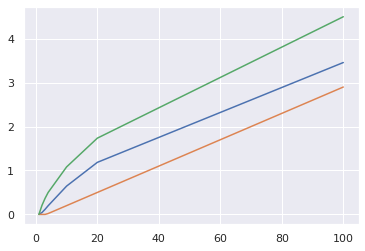

In [44]:
x = np.array([1,2,3,4,10,20,100])
plt.plot(x, [0.00285, 0.04325, 0.11563, 0.19750, 0.6445, 1.1850, 3.4575])
plt.plot(x, [max(0.03*k-0.1,0) for k in x])
plt.plot(x, 0.5*(np.sqrt(x)-1))

In [9]:
with open(f"{DATA_DIRECTORY}/r_list.txt", 'w') as f:
    for key,value in r_dict.items():
        f.write(f'{key} {value}\n')

In [5]:
r_dict = {
1: 0.0028415398628356993,
2: 0.043223149764843365,
3: 0.11571848987424593,
4: 0.1973927262346378,
5: 0.2798617878966828,
6: 0.35934060196676304,
7: 0.4356106834347989,
8: 0.5083126959104715,
9: 0.5775260144730094,
10: 0.6438379204443119,
11: 0.7070884170387808,
12: 0.7688758843942585,
13: 0.826370177411681,
14: 0.8821803112602125,
15: 0.9365649843124959,
16: 0.9901619063691549,
17: 1.0411304154148118,
18: 1.0900938815067702,
19: 1.1388802445710648,
20: 1.1858246567064903,
21: 1.2311095081737373,
22: 1.275857740331388,
23: 1.3193423410082834,
24: 1.3621657580983364,
25: 1.4030511070944374,
26: 1.444016826040377,
27: 1.4846146532216709,
28: 1.5238959038558004,
29: 1.5624331828422253}

In [6]:
r_dict

{1: 0.0028415398628356993,
 2: 0.043223149764843365,
 3: 0.11571848987424593,
 4: 0.1973927262346378,
 5: 0.2798617878966828,
 6: 0.35934060196676304,
 7: 0.4356106834347989,
 8: 0.5083126959104715,
 9: 0.5775260144730094,
 10: 0.6438379204443119,
 11: 0.7070884170387808,
 12: 0.7688758843942585,
 13: 0.826370177411681,
 14: 0.8821803112602125,
 15: 0.9365649843124959,
 16: 0.9901619063691549,
 17: 1.0411304154148118,
 18: 1.0900938815067702,
 19: 1.1388802445710648,
 20: 1.1858246567064903,
 21: 1.2311095081737373,
 22: 1.275857740331388,
 23: 1.3193423410082834,
 24: 1.3621657580983364,
 25: 1.4030511070944374,
 26: 1.444016826040377,
 27: 1.4846146532216709,
 28: 1.5238959038558004,
 29: 1.5624331828422253}

In [ ]:
r1 = 0.00285
r2 = 0.04325
r3 = 0.11563
r4 = 0.19750
r10 = 0.6445
r20 = 1.1850
r100 = 3.4575